<a href="https://colab.research.google.com/github/KhresnaPanduI/Tugas-ML-UGM-backprogation/blob/main/Tugas2_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import shutil
import os
import cv2
from google.colab.patches import cv2_imshow

In [2]:
data_dir = '/content/drive/MyDrive/Datasets/partial flower' #data directory

#create new folder for train dan test, for each class 

Function to load image

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

#test the function
tes = load_images_from_folder(data_dir + '/daisy')
print(len(tes))

100


Function to split data to train and test with default 0.8 for traning data

In [4]:
def split(data, train_size = 0.8):
  data = np.array(data, dtype=object)
  #shuffle data to balance distribution
  np.random.shuffle(data)

  train_length = int(train_size * len(data))
  train = data[:train_length]
  test = data[train_length:]

  return train, test

#test the function
tes = load_images_from_folder(data_dir + '/daisy')
train_tes, test_tes = split(tes)
print(len(train_tes))
print(len(test_tes))

80
20


Load all folder

In [5]:
daisy = load_images_from_folder(data_dir + '/daisy')
dandelion = load_images_from_folder(data_dir + '/dandelion')
sunflower = load_images_from_folder(data_dir + '/sunflower')

#split data
daisy_train, daisy_test = split(daisy)
dandelion_train, dandelion_test = split(dandelion)
sunflower_train, sunflower_test = split(sunflower)

print(len(daisy_train), len(daisy_test))

80 20


Function to create label and combine dataset

In [6]:
def label(data, label):
  return [label for each in range(len(data))]

def combine(*arg):
  all = []
  for kelas in arg:
    for img in kelas:
      all.append(img)
    
  return all

#create label for each class
daisy_lb_train     = label(daisy_train, 0)
dandelion_lb_train = label(dandelion_train, 1)
sunflower_lb_train = label(sunflower_train, 2)

daisy_lb_test     = label(daisy_test, 0)
dandelion_lb_test = label(dandelion_test, 1)
sunflower_lb_test = label(sunflower_test, 2)

#combine all data to one list, X_train
X_train = combine(daisy_train, dandelion_train, sunflower_train)
#combine all data to one list, X_test
X_test = combine(daisy_test, dandelion_test, sunflower_test)

#combine all label to one list, y_train
y_train = combine(daisy_lb_train, dandelion_lb_train, sunflower_lb_train)
#combine all label to one list, y_test
y_test = combine(daisy_lb_test, daisy_lb_test, daisy_lb_test)

Resize all image to (240, 320)

In [7]:
def resize(data):
  img = []
  for image in data:
    img.append(cv2.resize(image,(320,240)))
  return img
X_train = resize(X_train)
X_test = resize(X_test)

In [8]:
print(len(daisy_lb_train))

80


Function to grayscale

rgb


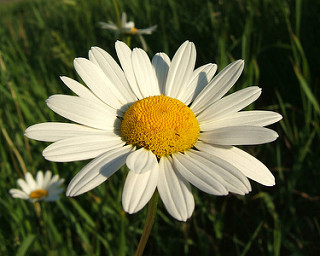

grayscaled


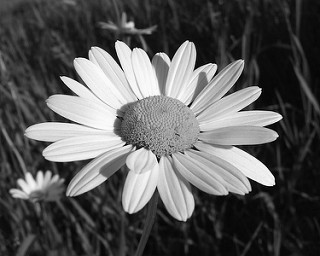

In [9]:
def grayscale(data):
  img_gray = []
  for image in data:
    img_gray.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
  return img_gray

#test the function
tes = load_images_from_folder(data_dir + '/daisy')
print('rgb')
cv2_imshow(tes[1])

tes_gray = grayscale(tes)

print('grayscaled')
cv2_imshow(tes_gray[1])

#Grayscale all data
X_train = grayscale(X_train)
X_test = grayscale(X_test)

Function to flatten data

In [10]:
def flatten(data):
  flatten_data = []
  for img in data:
    flat_img = [j for sub in tes_gray[0] for j in sub]
    flatten_data.append(flat_img)
  return flatten_data

#flatten all image
X_train = flatten(X_train)

Functio to normalize data

In [11]:
def normalize(data):
  normalized_data = []
  for img in data:
    normalized_data.append([pxl/255. for pxl in img])
  return normalized_data

X_train = normalize(X_train)
#convert to numpy 
print(X_train[0])


[0.16862745098039217, 0.16862745098039217, 0.16862745098039217, 0.17254901960784313, 0.1803921568627451, 0.1803921568627451, 0.1803921568627451, 0.17647058823529413, 0.1843137254901961, 0.18823529411764706, 0.19215686274509805, 0.19607843137254902, 0.2, 0.20392156862745098, 0.21176470588235294, 0.2196078431372549, 0.21176470588235294, 0.21568627450980393, 0.2196078431372549, 0.22745098039215686, 0.23529411764705882, 0.23921568627450981, 0.23921568627450981, 0.23921568627450981, 0.24705882352941178, 0.25098039215686274, 0.2549019607843137, 0.2627450980392157, 0.26666666666666666, 0.26666666666666666, 0.27058823529411763, 0.27058823529411763, 0.2823529411764706, 0.2823529411764706, 0.28627450980392155, 0.2901960784313726, 0.29411764705882354, 0.30196078431372547, 0.30980392156862746, 0.3137254901960784, 0.3137254901960784, 0.3176470588235294, 0.3215686274509804, 0.3215686274509804, 0.3215686274509804, 0.3176470588235294, 0.3215686274509804, 0.3215686274509804, 0.32941176470588235, 0.3254

Define sigmoid function

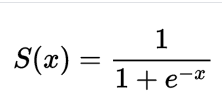

In [12]:
def sigmoid(x):
    # sigmoid function
    g = 1 / (1 + np.exp(-x))
    return g

def sigmoid_prime(z):
    sg = sigmoid(z)
    return sg * (1 - sg)

Function to initialize weight

In [13]:
def init_weights(self):
    w1 = np.random.uniform(-1.0, 1.0,
                            size=(self.n_hidden_units, self.n_features))
    w2 = np.random.uniform(-1.0, 1.0,
                            size=(self.n_classes, self.n_hidden_units))
    return w1, w2

In [14]:
CLASS_NAMES = ['daisy', 'dandelion', 'sunflower']

In [15]:
def mle(y, axis=1):
    return np.argmax(y, axis)

def one_hot(y, n_labels):
    mat = np.zeros((len(y), n_labels))
    for i, val in enumerate(y):
        mat[i, val] = 1
    return mat

def cross_entropy(outputs, y_target):
    return -np.sum(np.log(outputs) * y_target, axis=1)

def L2_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.sum(w1 ** 2) + np.sum(w2 ** 2))


def L1_reg(lambda_, w1, w2):
    return (lambda_ / 2.0) * (np.abs(w1).sum() + np.abs(w2).sum())

In [16]:
class NNClassifier:

    def __init__(self, n_classes, n_features, n_hidden_units=30,
                 l1=0.0, l2=0.0, epochs=500, learning_rate=0.01,
                 n_batches=1, random_seed=None):

        if random_seed:
            np.random.seed(random_seed)
        self.n_classes = n_classes
        self.n_features = n_features
        self.n_hidden_units = n_hidden_units
        self.w1, self.w2 = self._init_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.n_batches = n_batches

    def _init_weights(self):
        w1 = np.random.uniform(-1.0, 1.0,
                               size=(self.n_hidden_units, self.n_features))        
        w2 = np.random.uniform(-1.0, 1.0,
                               size=(self.n_classes, self.n_hidden_units))
        return w1, w2
      
    def _forward(self, X):
        net_input = X.copy()
        net_hidden = self.w1.dot(net_input.T)
        act_hidden = sigmoid(net_hidden)
        net_out = self.w2.dot(act_hidden)
        act_out = sigmoid(net_out)
        return net_input, net_hidden, act_hidden, net_out, act_out
    
    def _backward(self, net_input, net_hidden, act_hidden, act_out, y):
        sigma3 = act_out - y
        sigma2 = self.w2.T.dot(sigma3) * sigmoid_prime(net_hidden)
        grad1 = sigma2.dot(net_input)
        grad2 = sigma3.dot(act_hidden.T)
        return grad1, grad2      

    def _error(self, y, output):
        L1_term = L1_reg(self.l1, self.w1, self.w2)
        L2_term = L2_reg(self.l2, self.w1, self.w2)
        error = cross_entropy(output, y) + L1_term + L2_term
        return 0.5 * np.mean(error)

    def _backprop_step(self, X, y):
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(X)
        y = y.T

        grad1, grad2 = self._backward(net_input, net_hidden, act_hidden, act_out, y)

        # regularize
        grad1 += (self.w1 * (self.l1 + self.l2))
        grad2 += (self.w2 * (self.l1 + self.l2))

        error = self._error(y, act_out)
        
        return error, grad1, grad2

    def predict(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return mle(net_out.T)
    
    def predict_proba(self, X):
        Xt = X.copy()
        net_input, net_hidden, act_hidden, net_out, act_out = self._forward(Xt)
        return softmax(act_out.T)

    def fit(self, X, y):
        self.error_ = []
        X_data, y_data = X.copy(), y.copy()
        y_data_enc = one_hot(y_data, self.n_classes)
                
        X_mbs = np.array_split(X_data, self.n_batches)
        y_mbs = np.array_split(y_data_enc, self.n_batches)
        
        for i in range(self.epochs):
            
            epoch_errors = []

            for Xi, yi in zip(X_mbs, y_mbs):
                
                # update weights
                error, grad1, grad2 = self._backprop_step(Xi, yi)
                epoch_errors.append(error)
                self.w1 -= (self.learning_rate * grad1)
                self.w2 -= (self.learning_rate * grad2)
            self.error_.append(np.mean(epoch_errors))
        return self
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return np.sum(y == y_hat, axis=0) / float(X.shape[0])

In [ ]:
N_FEATURES = 240 * 320 # 240 * 320 pixels for the images
N_CLASSES = 3
RANDOM_SEED = 42

nn = NNClassifier(
    n_classes=N_CLASSES, 
    n_features=N_FEATURES,
    n_hidden_units=250,
    l2=0.1,
    l1=0.0,
    epochs=50,
    learning_rate=0.8,
    n_batches=25,
    random_seed=RANDOM_SEED
).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
!pip install mpld3

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

def plot_error(model):
    plt.plot(range(len(model.error_)), model.error_)
    plt.ylabel('Error')
    plt.xlabel('Epochs')
    plt.show()

plot_error(nn)

In [ ]:
print('Train Accuracy: %.2f%%' % (nn.score(X_train, y_train) * 100))
#print('Test Accuracy: %.2f%%' % (nn.score(X_test_scaled, y_test) * 100))

SEMUA YANG DIBAWAH COBA COBA

In [ ]:
tes_gray[0].shape
print(tes_gray[0])